In [1]:
import pandas as pd

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
import seaborn as sns

In [ ]:
pip install matplotlib==3.6

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import GridSearchCV

In [2]:
import joblib

In [6]:
fraudtrain=pd.read_csv(r"C:\Users\kirut\fraudTrain.csv")
fraudtest=pd.read_csv(r"C:\Users\kirut\fraudTest.csv")

In [7]:
print(fraudtrain.head())
print(fraudtest.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [8]:
print(fraudtrain.isnull().sum())
print(fraudtest.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat            

In [9]:
print(fraudtrain.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [10]:
print(fraudtest.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [11]:
print(fraudtrain['is_fraud'].value_counts())
print(fraudtest['is_fraud'].value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64
is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [12]:
fraudtrain.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [13]:
fraudtest.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [24]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

In [25]:
pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 441.3 kB/s eta 0:00:24
   - -------------------------------------- 0.5/11.1 MB 441.3 kB/s eta 0:00:24
   -- ------------------------------------- 0.8/11.1 MB 524.3 kB/s eta 0:00:20
   -- ------------------------------------- 0.8/11.1 MB 524.3 kB/s eta 0:00:20
   --- ------------------------------------ 1.0/11.1 MB 578.7 kB/s eta 0:00:18
   ---- ----------------------------------- 1.3/11.1 MB 627.1 kB/s eta 0:00:16
   ---- ----------------------------------- 1.3/11.1 MB 627.1 kB/s eta 0:00:16
   ----- ---------------------------------- 1.6/11.1 MB 645.4 kB/s eta 0:00:15
   ----- ---------

In [27]:
df_combined = pd.concat([fraudtrain, fraudtest], axis=0, ignore_index=True)
df_combined.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [30]:
df_combined.shape

(1852394, 23)

In [31]:
df_combined.size

42605062

In [32]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [36]:
# List of columns to drop
columns_to_drop = ["first", "last", "job", "dob", "trans_num", "street", "trans_date_trans_time", "city", "state"]

# Drop only columns that exist in the dataframe
df_combined = df_combined.drop(columns=[col for col in columns_to_drop if col in df_combined.columns])

# Print the updated dataframe to verify
print(df_combined.head())


   Unnamed: 0            cc_num                            merchant  \
0           0  2703186189652095          fraud_Rippin, Kub and Mann   
1           1      630423337322     fraud_Heller, Gutmann and Zieme   
2           2    38859492057661                fraud_Lind-Buckridge   
3           3  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4           4   375534208663984                 fraud_Keeling-Crist   

        category     amt gender    zip      lat      long  city_pop  \
0       misc_net    4.97      F  28654  36.0788  -81.1781      3495   
1    grocery_pos  107.23      F  99160  48.8878 -118.2105       149   
2  entertainment  220.11      M  83252  42.1808 -112.2620      4154   
3  gas_transport   45.00      M  59632  46.2306 -112.1138      1939   
4       misc_pos   41.96      M  24433  38.4207  -79.4629        99   

    unix_time  merch_lat  merch_long  is_fraud  
0  1325376018  36.011293  -82.048315         0  
1  1325376044  49.159047 -118.186462         0  

Data Visualization


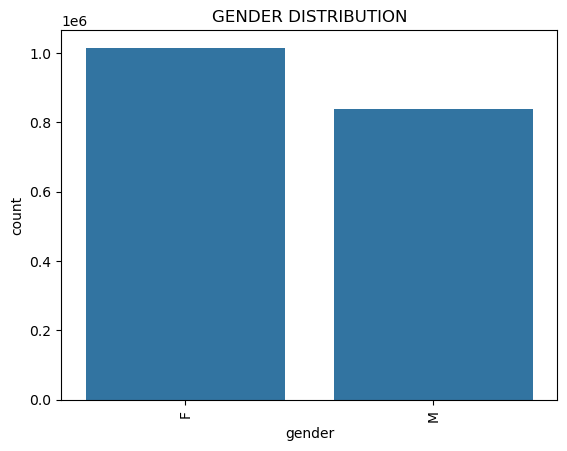

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.countplot(x='gender', data=df_combined)

# Set the title
plt.title('GENDER DISTRIBUTION')

# Rotate x-axis labels if necessary
plt.xticks(rotation=90)

# Show the plot
plt.show()


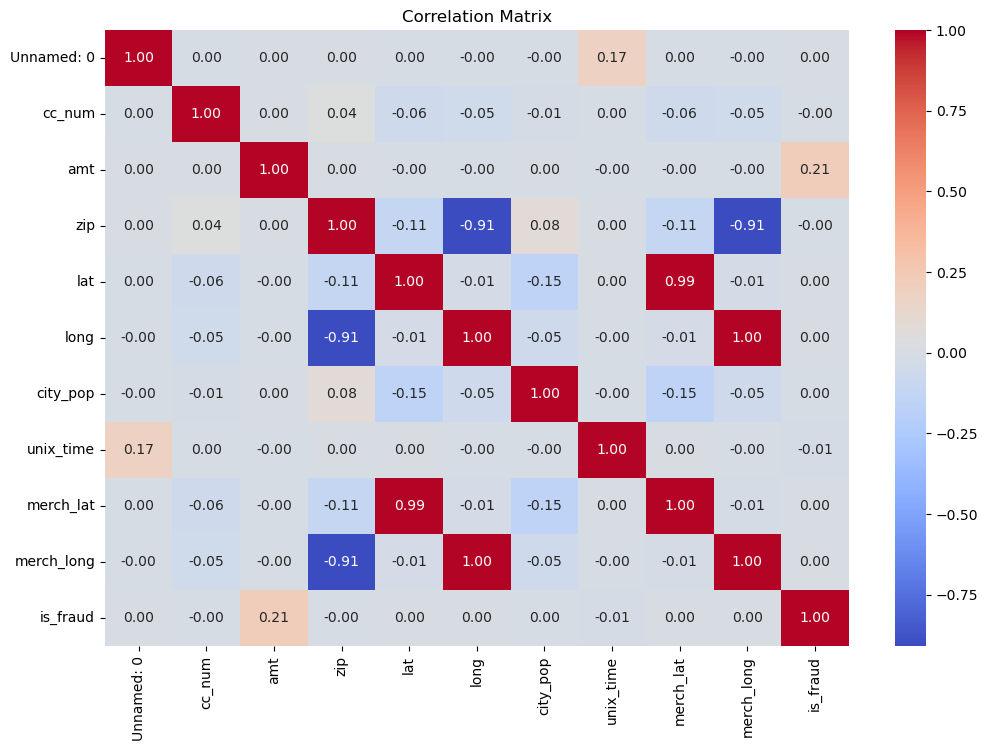

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the dataframe
df_combined_numeric = df_combined.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df_combined_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)

# Add a title
plt.title("Correlation Matrix")
plt.show()


In [43]:
print(df_combined.columns)

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Prepare data
X = df_combined.drop("is_fraud", axis=1)
y = df_combined["is_fraud"]

# Encode categorical variables
X = X.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtypes == 'object' else col)

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = map(StandardScaler().fit_transform, [X_train, X_test])

# Train and predict
r_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = r_model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[368359    167]
 [  1953      0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

Accuracy: 0.9942776783569379
